In [290]:
import numpy as np
import pandas as pd
# read
mixi = pd.read_csv('mixi2.csv')

In [241]:
# ref: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [242]:
# mixi.tail()

,title,category,makesense
293,A Knight of the Seven Kingdoms,SciFi,0
294,Daughter of Dragons,SciFi,0
295,Rendezvous with Rama,SciFi,0
296,Persepolis Rising,SciFi,0
297,FREE: Professional Integrity (A Riyria Chronic...,SciFi,0


In [291]:
mixi['title_length'] = mixi['title'].apply(len)

### Explore

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

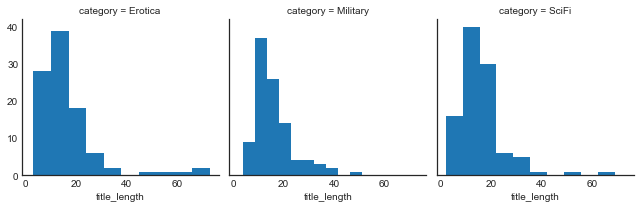

In [245]:
g = sns.FacetGrid(mixi,col='category')
g.map(plt.hist,'title_length')

In [293]:
import string
from nltk.corpus import stopwords
# Check characters to see if they are in punctuation
#nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
#nopunc = ''.join(nopunc)

In [294]:

i_you = stopwords.words('english')[0:26] # words mentioning you or I
test = mixi["title"][2]
nopunc = [char for char in test if char not in string.punctuation]
npunc = len([char for char in test if char in string.punctuation]) # number of punctuation

## number of punctuation, "you and I" words, all words

In [297]:
def n_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    npunc = len([char for char in text if char in string.punctuation]) 
    nopunc = ''.join(nopunc)
    wordlist = nopunc.split(" ")
    nword = len(wordlist)
    ni_you =len([word for word in wordlist if word.lower() in i_you]) # number of i and you
    return npunc,ni_you, nword

In [298]:
n_text(mixi["title"][2])

(0, 0, 2)

In [299]:
# mixi["nword"] = 0
# mixi["i_you"] = 0
# mixi["npunc"] = 0
#mixi.drop(["npunc", "i_you"], inplace = True, axis = 1)
mixi.head(3)
nword = np.zeros((len(mixi)))
iyou = np.zeros((len(mixi)))
npunc = np.zeros((len(mixi)))

In [300]:
for t,text in enumerate(mixi["title"]):
    (a,b,c) = n_text(text)
    nword[t] = c
    iyou[t] = b
    npunc[t] = a
    #print(t, text)


In [301]:
mixi["nword"] = nword
mixi["i_you"] = iyou
mixi["npunc"] = npunc
mixi.head(3)

,title,category,makesense,title_length,nword,i_you,npunc
0,Darker,Erotica,0,6,1.0,0.0,0.0
1,Twist Me: The Complete Trilogy,Erotica,0,30,5.0,1.0,1.0
2,Beautiful Bastard,Erotica,0,17,2.0,0.0,0.0


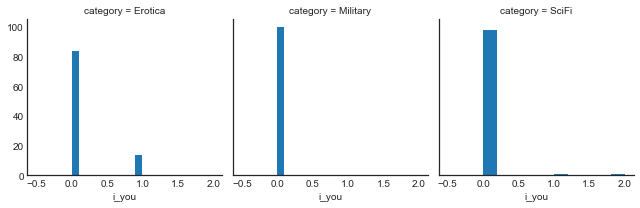

In [206]:
g = sns.FacetGrid(mixi,col='category')
g.map(plt.hist,'i_you')

In [207]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

## word to vector

In [215]:
### This takes pretty long
# uncomment to run

# from gensim.models import KeyedVectors
# filename = 'GoogleNews-vectors-negative300.bin'
# model = KeyedVectors.load_word2vec_format(filename, binary=True)


In [216]:
model.similarity("love", "affection")

0.5664337518378346

In [217]:
model.similarity("love", "adore")

0.6816873802589338

In [218]:
model.similarity("love", "dog")

0.2053461595578724

In [219]:
A = model.get_vector("love")
B2 = model.get_vector("adore")
B = model.get_vector("affection")
C = model.get_vector("dog")

In [220]:
from scipy.spatial import distance
dst = distance.euclidean(A,B)
dst

2.839298725128174

In [221]:
distance.euclidean(A ,C)

3.568361282348633

In [222]:
distance.euclidean(B2, C)

3.9738667011260986

In [223]:
#distance.euclidean((A + B2)/np.sqrt(sum((A + B)** 2)),C)
distance.euclidean((A + B2)/2,C)

3.5975492000579834

### string to vector

## Convert string to vector using the google model

In [551]:
def str2vec_mean(instr, placeholder = None):
    
    #model.vocab
    # make a place-holder
    if placeholder is None:
        ph = (model.get_vector("Ka_wai") + model.get_vector("Chief_Carla_Piluso") + model.get_vector("Marc_Andre_Bergeron"))/3
    ###
    nopunc = [char for char in instr if char not in string.punctuation]
    # Join the characters again to form the string.
    mystr = ''.join(nopunc).split()
    nonsense = ["the", "a", "an"]#, "and", "to","on", "from", "in", "by"]
    mystr = [word for word in mystr if word.lower() not in nonsense]
    L =len(mystr)
    #temp = np.zeros(300)
    if (mystr[0] in model.vocab):
        temp = model.get_vector(mystr[0])
    else:
        temp = placeholder
        # otherwise a vector of zeros
    if (L>1):
        for l in range(1,L):
            if (mystr[l] in model.vocab):
                temp = temp + model.get_vector(mystr[l])
            else:
                temp = temp + placeholder    
    
#temp = model.get_vector(list(A)[0])
#temp + model.get_vector(list(A)[1])
    out = temp/L
    return np.array(out.tolist())


In [554]:
A = str2vec_mean("rising strong", ph).tolist()
B = str2vec_mean("Awaken Giant Within", ph).tolist()
C = str2vec_mean("Call me by your name", ph).tolist()
distance.euclidean(A,B)

2.8057568431627447

In [555]:
distance.euclidean(A,C)

2.304184028698984

In [421]:
# takes forever
#result = model.most_similar(positive=[], negative=['love'], topn=1)
#print(result)

In [556]:
wordmat = np.zeros((298,300))

In [557]:
#wordmat[0,:] = temp

In [558]:
M = len(mixi) # number of examples
wordmat = np.zeros((M,300))
np.shape(wordmat)

(298, 300)

In [559]:
for m in range(M):
    A = mixi["title"][m]
    temp = str2vec_mean(A,ph).tolist()
    wordmat[m,:] = temp

In [560]:
featmat = mixi[["title_length", "nword", "i_you", "npunc"]]
featmat = featmat/30/ np.mean(featmat, axis = 0)
np.shape(featmat.as_matrix())
#wordmat1 = np.stack((featmat.as_matrix(), wordmat), axis = 1)
wordmat1 = np.hstack((featmat.as_matrix(), wordmat))
# np.shape(wordmat1)
#wordmat1[2,0:5]

In [633]:
from matplotlib import pyplot
plt.rcParams["figure.figsize"] = [16,9]
from sklearn import manifold
makesense = mixi["makesense"] == 1
temp = wordmat[makesense, :]

In [634]:
#Y = manifold.MDS(n_components,dissimilarity='precomputed').fit_transform(vi_mat)
Y1 = manifold.MDS(n_components= 2,dissimilarity='euclidean').fit_transform(wordmat)

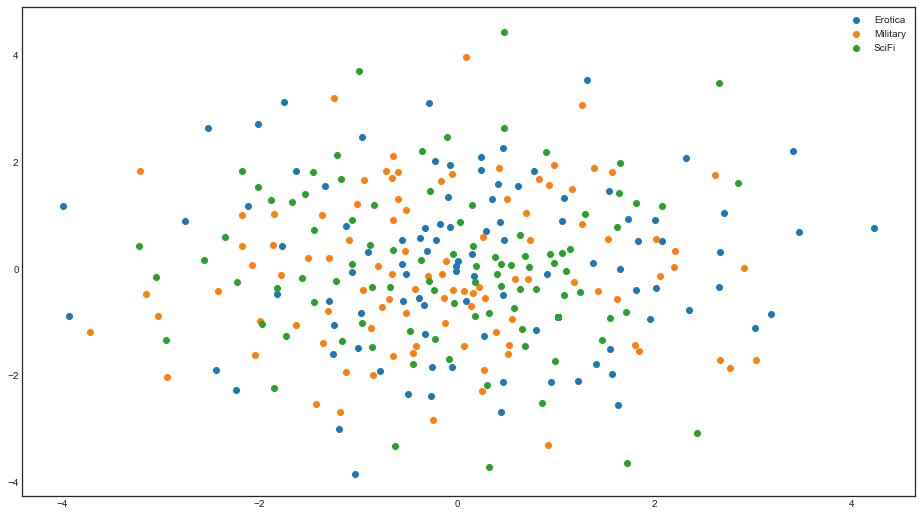

In [832]:
fig, ax = plt.subplots()
fig=plt.figure(figsize=(18, 20), dpi= 180, facecolor='w', edgecolor='k')
for i,c in enumerate(mixi["category"].unique()):
    ind = (mixi["category"] == c) 
#ind1 = (mixi["category"] == "Erotica") 
  #  ax.scatter(result[ind, 0], result[ind, 1],c = i,label = mixi["category"])
    ax.scatter(Y1[ind, 0], Y1[ind, 1], label = c)

for m in range():
    ax.annotate(str(m), xy=(Y1[m, 0], Y1[m, 1]))
ax.legend()

In [638]:
# mixi["title"][[183, 128]]
# mixi["title"][[161, 121]]
mixi["title"][[74, 218]]

74     The Drifter
218      Renegades
Name: title, dtype: object

In [851]:
Y = manifold.MDS(n_components= 2,dissimilarity='euclidean').fit_transform(wordmat1[makesense])

In [852]:
subset = mixi[["title","category"]][makesense]

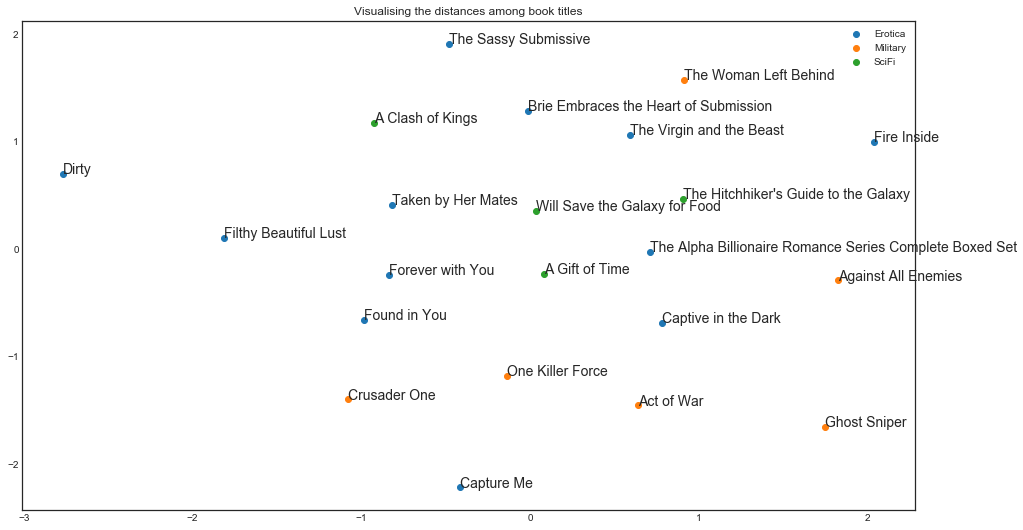

In [853]:
fig, ax = plt.subplots()
fig=plt.figure(figsize=(18, 16), dpi= 180, facecolor='w', edgecolor='k')
for i,c in enumerate(subset["category"].unique()):
    ind = (subset["category"] == c) 
#ind1 = (mixi["category"] == "Erotica") 
  #  ax.scatter(result[ind, 0], result[ind, 1],c = i,label = mixi["category"])
    ax.scatter(Y[ind, 0], Y[ind, 1], label = c)
   # ax.annotate(mixi["title"][9], xy=(result[9, 0], result[9, 1]))


#ax.scatter(Y[:, 0], Y[:, 1], label = mixi["category"][examples])
for i,m in enumerate(subset["title"]):
    ax.annotate(m, xy=(Y[i, 0], Y[i, 1]),fontsize = 14)
#ax.annotate(mixi["title"][1], xy=(Y[1, 0], Y[1, 1]))
ax.set_title("Visualising the distances among book titles")
ax.legend()

In [830]:

#fig.savefig('fig_makesense.png',  dpi = 400, linewidth = 2)

## Application: a fuzzy search machine

In [837]:
from scipy.stats import rankdata

In [838]:
def fuzzy_find(mytitle, maxshow = 10,threshhold = 2.5):
    A = str2vec_mean(mytitle, ph)
    dist = np.sqrt(np.sum((wordmat-A) ** 2,axis = 1))
    fuzzy = np.where(dist < threshhold)[0]
    L = len(fuzzy)
    if L > maxshow:
        rankF = rankdata(dist, method='min')
        fuzzy = np.where(rankF <= maxshow)[0]
    return mixi["title"][fuzzy], dist[fuzzy]

## Say, I remember someone told me about a book called "Butterfly in resin", or something like that

### and [cannot find it on audible.com](https://www.audible.com/search/ref=a_hp_tseft?advsearchKeywords=butterfly%20in%20resin&filterby=field-keywords)

In [848]:
(result, dist) = fuzzy_find("Butterfly in resin", maxshow = 3) # 1.8
result

162    Brie Masters Love in Submission: Submissive in...
174     Cincuenta Sombras de Grey [Fifty Shades of Grey]
267                                   Dragonfly in Amber
Name: title, dtype: object

### ...when the book is actually "Dragonfly in amber"

## Another example: "Something Six empire"

In [823]:
mytitle = "six empire"
any(mixi["title"] == mytitle)

False

In [827]:
(result, dist) = fuzzy_find(mytitle, maxshow=3,threshhold = 2.5) # 1.8
result

48             Tom Clancy: Power and Empire
56     Tom Clancy True Faith and Allegiance
293          A Knight of the Seven Kingdoms
Name: title, dtype: object

### Visualize the application

In [807]:
mytitle = "Call me by your name"
res,dist = fuzzy_find(mytitle, maxshow = 3)
ind = np.array(res.keys()) 
A = list(ind)
B = list(np.arange(0,290, 15)[:])
ind = list(set(A) | set(B))
len(ind)

23

In [817]:
target_vec = str2vec_mean(mytitle, ph)
# vector matrix
temp = np.zeros((len(ind)+1,300))
temp[0:len(ind),:] = wordmat[ind, :]
temp[-1,:] = target_vec
# titles
tempdb = pd.DataFrame([mytitle])
subset = mixi["title"][ind].append(tempdb)
# distances to target
dist = np.sqrt(np.sum((wordmat[ind,:]-target_vec) ** 2,axis = 1))
distemp = np.zeros(np.shape(dist)[0] +1)
distemp[0:len(dist)] = dist
subset.columns = ["title"]

In [819]:
res

3                         Reflected in You
26                        Forever with You
56    Tom Clancy True Faith and Allegiance
Name: title, dtype: object

In [820]:
Y = manifold.MDS(n_components= 2,dissimilarity='euclidean',n_init=100).fit_transform(temp)

Text(0.5,1,'Book titles on a 2D space')

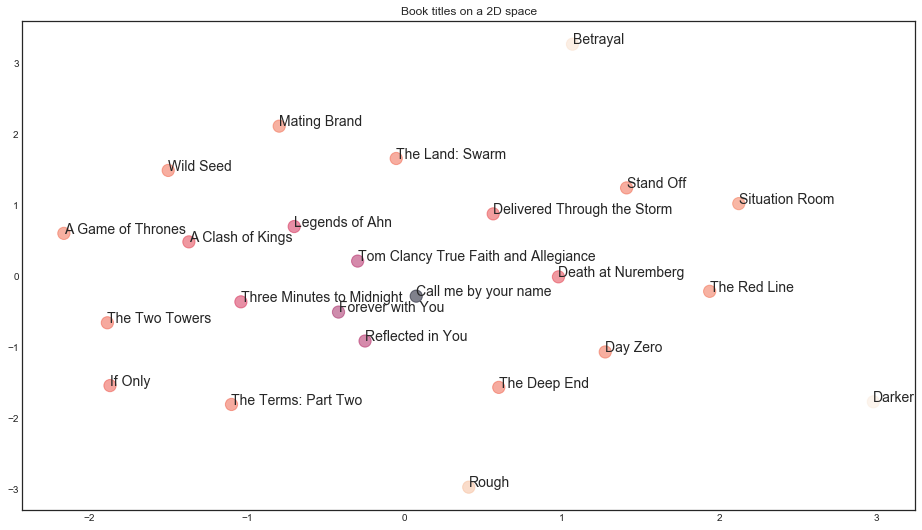

In [821]:
fig, ax = plt.subplots()
fig = plt.figure(figsize=(18, 16), dpi= 180, facecolor='w', edgecolor='k')

sc = ax.scatter(Y[:, 0], Y[:, 1], c = distemp, s = 150, alpha= 0.5)
for i,m in enumerate(subset["title"]):
    ax.annotate(m, xy=(Y[i, 0], Y[i, 1]),fontsize = 14)
ax.set_title("Book titles on a 2D space")



## another

In [857]:
mytitle = "Butterfly in resin"
res,dist = fuzzy_find(mytitle, maxshow = 3)
ind = np.array(res.keys()) 
A = list(ind)
B = list(np.arange(1,290, 15)[:])
ind = list(set(A) | set(B))
len(ind)

23

In [858]:
target_vec = str2vec_mean(mytitle, ph)
# vector matrix
temp = np.zeros((len(ind)+1,300))
temp[0:len(ind),:] = wordmat[ind, :]
temp[-1,:] = target_vec
# titles
tempdb = pd.DataFrame([mytitle])
subset = mixi["title"][ind].append(tempdb)
# distances to target
dist = np.sqrt(np.sum((wordmat[ind,:]-target_vec) ** 2,axis = 1))
distemp = np.zeros(np.shape(dist)[0] +1)
distemp[0:len(dist)] = dist
subset.columns = ["title"]
res

162    Brie Masters Love in Submission: Submissive in...
174     Cincuenta Sombras de Grey [Fifty Shades of Grey]
267                                   Dragonfly in Amber
Name: title, dtype: object

In [859]:
Y = manifold.MDS(n_components= 2,dissimilarity='euclidean',n_init=100).fit_transform(temp)

Text(0.5,1,'Book titles on a 2D space')

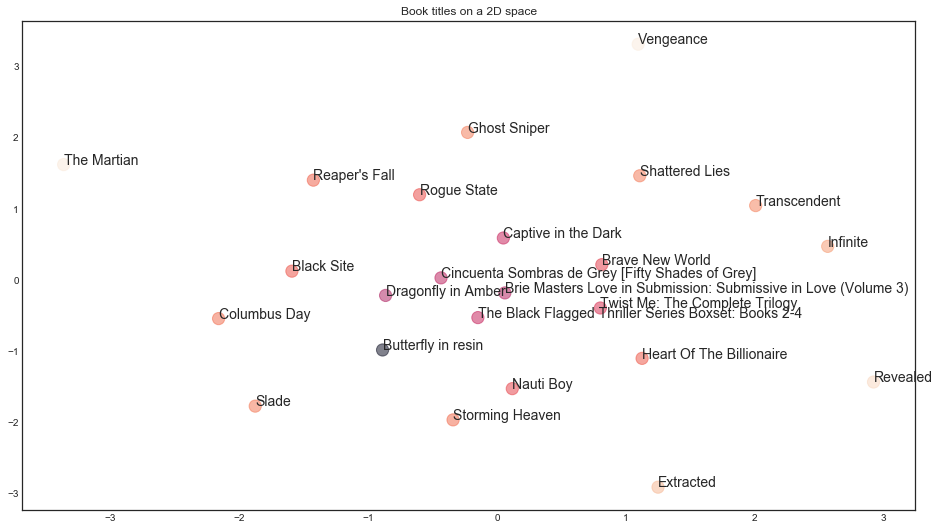

In [860]:
fig, ax = plt.subplots()
fig = plt.figure(figsize=(18, 16), dpi= 180, facecolor='w', edgecolor='k')

sc = ax.scatter(Y[:, 0], Y[:, 1], c = distemp, s = 150, alpha= 0.5)
for i,m in enumerate(subset["title"]):
    ax.annotate(m, xy=(Y[i, 0], Y[i, 1]),fontsize = 14)
ax.set_title("Book titles on a 2D space")